In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from PIL import Image

In [3]:
data = pd.read_csv("instagram.csv", encoding = 'latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
# if data had null values we could use code below to eliminate null values, dropna(inplace=True)

#data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


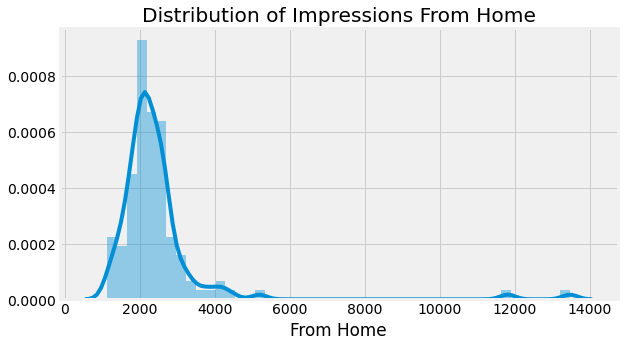

In [7]:
plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

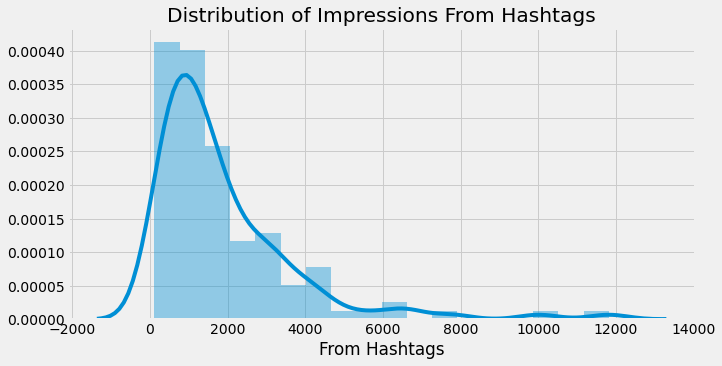

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

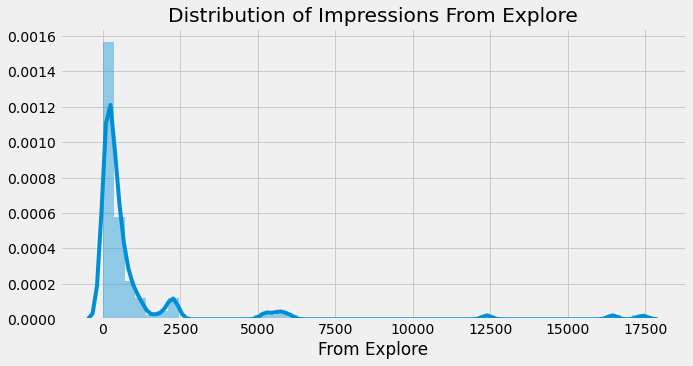

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

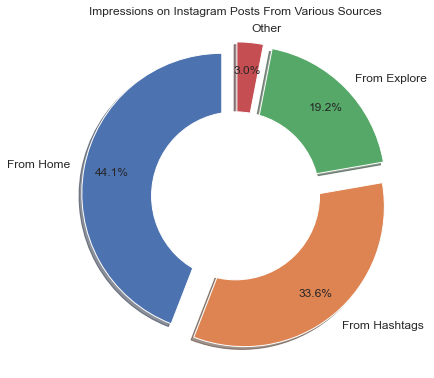

In [10]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]
explode = (0.1, 0.1, 0.1, 0.1)

# fig, ax = plt.subplots()
sns.set(font_scale = 1)
plt.figure(figsize=(6,6))
plt.title("Impressions on Instagram Posts From Various Sources")

plt.pie(values, explode=explode, 
       labels=labels, 
       autopct='%1.1f%%', 
       shadow=True, 
       startangle=90,
       textprops={'fontsize':12},
       pctdistance=0.80,)


hole = plt.Circle((0, 0), 0.6, facecolor='white')
# Current Figure ( plt.gcf() ) 
# --> Current Axis ( gca() ) 
# --> add the hole 
plt.gcf().gca().add_artist(hole)

plt.show()

In [15]:
text = " ".join(i for i in data.Caption)

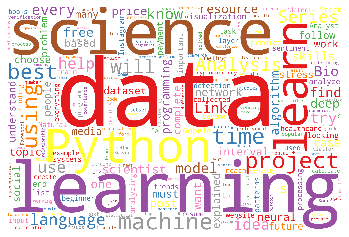

In [32]:

stopwords = set(STOPWORDS)
mask = np.array(Image.open('4.png'))
wordcloud = WordCloud(stopwords=stopwords,
                      width=3000,
                      height=2000,
                      random_state=1,
                      colormap='Set1',
                      collocations=False,
                      background_color="white",
#                       mask=mask,
                     ).generate(text)
# plt.style.use('classic')
# plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

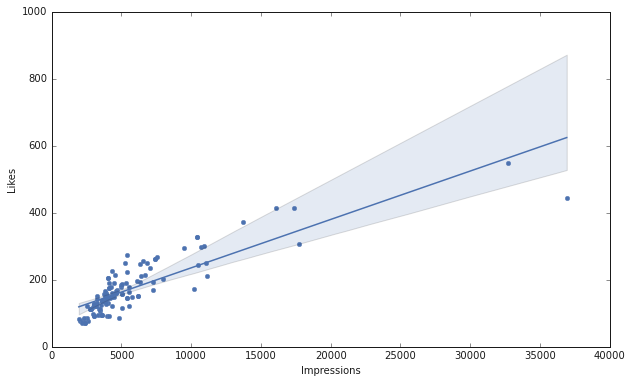

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Impressions",
                y="Likes",
                data=data)
sns.regplot(x = "Impressions",
            y = "Likes",
            data = data)
plt.show()

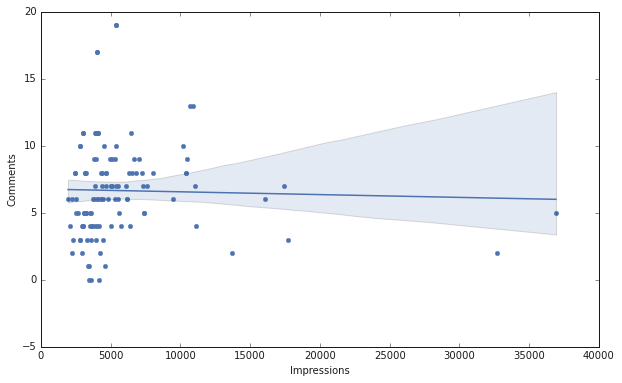

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Impressions",
                y="Comments",
                data=data)
sns.regplot(x = "Impressions",
            y = "Comments",
            data = data)
plt.show()

In [47]:
correlation = data.corr()
correlation["Impressions"].sort_values(ascending=False)

<ipython-input-47-e3e62f3d3ef5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [51]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
conversion_rate

41.00265604249668

In [52]:
conversion_rate2 = (data["Follows"].sum() / data["Comments"].sum()) * 100
conversion_rate2

311.4754098360656

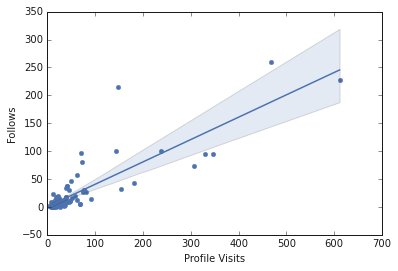

In [56]:
# plt.figure(figsize=(6,4))
sns.scatterplot(x="Profile Visits",
                y="Follows",
                data=data)
sns.regplot(x = "Profile Visits",
            y = "Follows",
            data = data)
plt.show()

In [59]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.25, 
                                                random_state=50)

In [60]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8978723390378928

In [61]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12989.94914504])